# Imports

In [0]:
import gdown
import pandas as pd

!pip install torchviz
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable
from torchviz import make_dot
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import cv2
from PIL import Image

from glob import glob
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np # we always love numpy
import time
from google.colab.patches import cv2_imshow

# Load Data

In [0]:
gdown.download('https://drive.google.com/uc?authuser=0&id=1U1JpP4fH1NgsminyKKF9BDdKUumdGhB1&export=download',
             'ImageKey.csv', False)
gdown.download('https://drive.google.com/uc?authuser=0&id=1Ln4QzD_ZLSxjo-5SNpQEmI8WgcN9J9VK&export=download',
             'EvaluationKey.csv', False)


image_key = pd.read_csv('ImageKey.csv')
evaluation_key = pd.read_csv('EvaluationKey.csv')

Downloading...
From: https://drive.google.com/uc?authuser=0&id=1U1JpP4fH1NgsminyKKF9BDdKUumdGhB1&export=download
To: /content/ImageKey.csv
5.35MB [00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?authuser=0&id=1Ln4QzD_ZLSxjo-5SNpQEmI8WgcN9J9VK&export=download
To: /content/EvaluationKey.csv
100%|██████████| 224k/224k [00:00<00:00, 34.9MB/s]


## Sample Useful Functions

In [0]:
image_key.head()

NameError: ignored

In [0]:
np.shape(image_key)

(45671, 10)

In [0]:
image_key[image_key['Image']=="181013_16_45_42_Brick_2x1_L_crop1.jpg"].index.item()

2

In [0]:
image_key.Brick[1]

'2x2 L'

In [0]:
bricks = image_key.Brick.unique()
bricks

array(['2x2 L', '1x4', '1x1', '2x2', '2x3', '1x2'], dtype=object)

In [0]:
classes = image_key.Brick.unique()

In [0]:
np.where(bricks == '1x4')

(array([1]),)

# Image Loading

In [0]:
gdown.download('https://drive.google.com/uc?authuser=0&id=1Z_rAAy-3UCK3yy-c9_Mxnx7Z34oxGwNL&export=download', 'lego-vs-generic-brick-image-recognition.zip', False)

Downloading...
From: https://drive.google.com/uc?authuser=0&id=1Z_rAAy-3UCK3yy-c9_Mxnx7Z34oxGwNL&export=download
To: /content/lego-vs-generic-brick-image-recognition.zip
1.65GB [00:25, 63.6MB/s]


'lego-vs-generic-brick-image-recognition.zip'

In [0]:
# Unzip datasets - working
!unzip -qq -o lego-vs-generic-brick-image-recognition.zip

In [0]:
# Unzip photo dirs
!unzip -qq -o Base\ Images.zip
!unzip -qq -o Cropped\ Images.zip

In [0]:
!cd Cropped\ Images && ls

'Additional 1x1 Captures'   Bricks  'Evaluation Set'   Legos


## Old Unused Stuff 

Base Images/Legos/181018_19_51_45_Lego_1x2_cam0.jpg


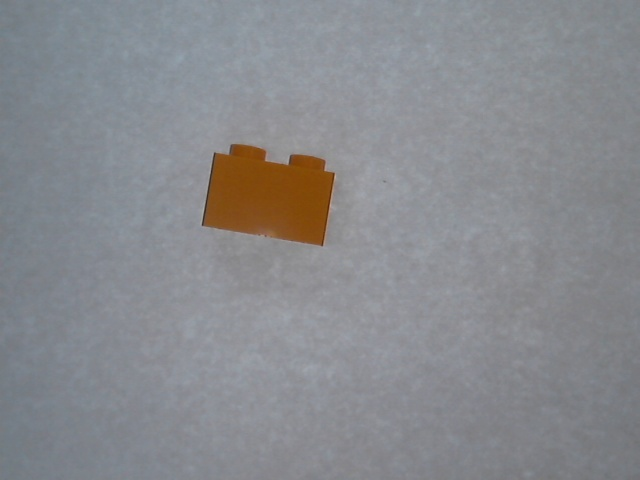

In [0]:
# View images
import matplotlib.pyplot as plt
from glob import glob
from imageio import imread
for lego_pic in glob("Base Images/Legos/*.jpg")[:1]:
    print(lego_pic)
    im = cv2.imread(lego_pic)
    cv2_imshow(im)
#     plt.axis('off')
#     plt.show()

Additional 1x1 Captures


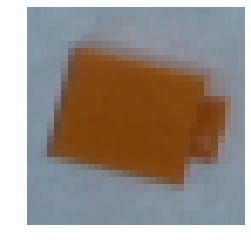

torch.Size([3, 32, 32])


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [0]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def show_image(img_tensor):
    # need to reorder the tensor dimensions to work properly with imshow
    plt.imshow(img_tensor.transpose(0,2).transpose(0,1))
    plt.axis('off')
    plt.show()

lego_train = ImageFolder(root='./Cropped Images', transform=transforms.Compose([#transforms.CenterCrop((200,200)),
                                             transforms.Resize((32,32)),
                                             transforms.ToTensor()]))

im, target = lego_train[1500]
print(lego_train.classes[target])
show_image(im)
print(im.shape)

lego_train.targets


In [0]:
# print(target)
# lego_train.targets = np.ones(20441) + 2
# print(lego_train.targets)
# print(lego_train[1500])
# lego_train.classes = ['asdf', 'asdf2']
# print(lego_train.classes[target])
# lego_train.classes[target]#=np.ones(20441)# = [1,1,1]
# print(lego_train.classes)

In [0]:
# !ls Cropped\ Images/Additional\ 1x1\ Captures

## Working Torch Dataset Class

In [0]:
from torchvision.datasets import VisionDataset

In [0]:
def getFileName(filepath):
  idx = filepath.rfind("/")
  return filepath[idx+1:]

def show_image(img_tensor):
#   # Takes in PIL Image
#   I = imread(img)
#   plt.imshow(I)
#   plt.axis('off')
#   plt.show()

  # need to reorder the tensor dimensions to work properly with imshow
  plt.imshow(img_tensor.transpose(0,2).transpose(0,1))
  plt.axis('off')
  plt.show()

class LegoData(VisionDataset):
  """
  Dataset class for the lego data
  
  Args:
    img_path (string): Filepath for images (ex: Base Images/Legos/*.jpg)
    key_df (pandas DataFrame): Dataframe containing columns Folder1	Folder2	
                               Picture Group	Timestamp	Image	Background 
                               Capture	Brand	Brick
  """
  def __init__(self, filepaths, key_df, transform=None, target_transform=None):
      super(LegoData, self).__init__('.',
                                     transform=transform,
                                     target_transform=target_transform)

      self.filepaths = filepaths
      self.key_df = key_df
      self.transform = transform
      self.target_transform = target_transform
      
      self.classes = key_df.Brick.unique()

  def __getitem__(self, index):
      filepath = self.filepaths[index]
      
      img = Image.open(filepath)      
    
      # Get index of row for matching filepath
      # print("filepath", getFileName(filepath))
      key_idx = self.key_df[self.key_df['Image']==getFileName(filepath)].index.item()
      
      # Get corresponding lego class for file
      img_class = self.key_df.Brick[key_idx]

      # Get int representing lego class
      # print("img_class", img_class)
      target = int(np.where(self.classes == img_class)[0])
      # print("target", target)
      # apply transformations if they exist (this is useful for images)
      if self.transform is not None:
          img = self.transform(img)

      # apply transformations if they exist (this is useful for images)
      if self.target_transform is not None:
          target = self.target_transform(target)
      

      # ## TESTING
      # output = np.zeros(len(self.classes), dtype=np.int64)
      # output[target-1] = 1 

      # t = torch.from_numpy(output)
      return img, target

  def __len__(self):
      # print(len(self.filepaths))
      return len(self.filepaths)

## Verification

In [0]:
transform = transforms.Compose([#transforms.CenterCrop((200,200)), # Crop center of image
                                 transforms.Resize((32,32)), # Downsample image
                                 transforms.ToTensor()])     # Make pytorch happy
# target_transform = transforms.ToTensor()
raw_train_filepath_list = glob("Cropped Images/Legos/*.jpg")
filtered_train_filepath_list = [x for x in raw_train_filepath_list if not 'bg' in x] # Remove Background-only images
raw_test_filepath_list = glob("Cropped Images/Evaluation Set/*.jpg")
filtered_test_filepath_list = [x for x in raw_test_filepath_list if not 'bg' in x]

lego_data = LegoData(filtered_filepath_list, image_key, transform)#, target_transform)

NameError: ignored

In [0]:
lego_data #lego data will be split into training and test set later

Dataset LegoData
    Number of datapoints: 8344
    Root location: .
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

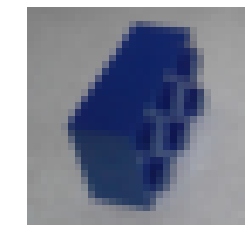

(3, 32, 32)


In [0]:
# print(im)
im, target = lego_data[8300] # Can put any index here

show_image(im)
print(tuple(im.shape))

# lego_data[100]

# CNN 1

In [0]:
# Data set information
transform = transforms.Compose([#transforms.CenterCrop((200,200)), # Crop center of image
                                 transforms.Resize((32,32)), # Downsample image
                                 transforms.ToTensor()])     # Make pytorch happy
    
raw_train_filepath_list = glob("Cropped Images/Legos/*.jpg")
filtered_train_filepath_list = [x for x in raw_train_filepath_list if not 'bg' in x] # Remove Background-only images
raw_test_filepath_list = glob("Cropped Images/Evaluation Set/*.jpg")
filtered_test_filepath_list = [x for x in raw_test_filepath_list if not 'bg' in x]

# lego_data is redundant TODO: get rid of this
lego_data = LegoData(filtered_train_filepath_list, image_key, transform)#, target_transform)
im, target = lego_data[0] # Use first image to get dataset characteristics

train_set = LegoData(filtered_train_filepath_list, image_key, transform) 
test_set = LegoData(filtered_test_filepath_list, image_key, transform)

img_dims = tuple(im.shape)
n_train_samples = int(len(train_set) * 0.5) # Number of train set images to use
n_test_samples = int(len(test_set) * 0.5) # Number of test set images to use TODO: Make this a different set
classes = lego_data.classes

train_sampler = SubsetRandomSampler(np.arange(n_train_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

In [0]:
class LegoCNN(nn.Module):
  def __init__(self):
    super(LegoCNN, self).__init__()
    num_kernels = 16 # TODO: Why 16?
    self.conv1 = nn.Conv2d(img_dims[0], num_kernels, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    self.maxpool_output_size = int(num_kernels * (img_dims[1] / 2) * (img_dims[2]/2)) # the /2 matches the stride from prev line

    # fc = fully connected (first fully connected layer)
    fc1_size = 64 # TODO Why 64 here?
    self.fc1 = nn.Linear(self.maxpool_output_size, fc1_size)
    self.activation_func = torch.nn.ReLU() # bc math...
    # Convert fc to outputs that line up with number of classes
    fc2_size = len(classes)
    self.fc2 = nn.Linear(fc1_size, fc2_size)

    # Defines operations and returns output of model
  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.activation_func(x)

    # Flattens output of conv, max pool, activation sequence
    x = x.view(-1, self.maxpool_output_size)
    x = self.fc1(x)
    x = self.activation_func(x)
    x = self.fc2(x)
    return x

  def get_loss(self, learning_rate):
    loss = nn.CrossEntropyLoss()
    optimizer = optim.Adam(self.parameters(), lr=learning_rate)
    return loss, optimizer



In [0]:
# help(nn.Conv2d)
LegoCNN()

LegoCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=64, bias=True)
  (activation_func): ReLU()
  (fc2): Linear(in_features=64, out_features=6, bias=True)
)

In [0]:
# device = 'cuda' # 'cpu' if we want to not use the gpu
device='cuda'
# Initialize the model, loss, and optimization function
net = LegoCNN()
# This tells our model to send all of the tensors and operations to the GPU (or keep them at the CPU if we're not using GPU)
net.to(device)

LegoCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=64, bias=True)
  (activation_func): ReLU()
  (fc2): Linear(in_features=64, out_features=6, bias=True)
)

# Individual Verification

In [0]:
def runTesting(train_size, test_size, net):
  print("Train size: " + str(train_size))
  print("Test size: " + str(test_size))
  # Define training parameters
  training_batch_size = train_size # Number of images to use in mini-batch to train  TODO: figure out how this affects results
  #10
  # I think if you make both of these bigger it'll take longer to run but it should be better
  testing_batch_size = test_size #default: 128 # Number of images to use in mini-batch to test TODO: figure out how this affects results 
  #50

  learning_rate = 1e-2  # TODO: how does this change things
  n_epochs = 3 #10 # TODO: orignal was 10, maybe try making it 10 again?
  # Get our data into the mini batch size that we defined
  train_loader = torch.utils.data.DataLoader(
      train_set, batch_size=training_batch_size, sampler=train_sampler, num_workers=2)
  test_loader = torch.utils.data.DataLoader(
      test_set, batch_size=testing_batch_size, sampler=test_sampler, num_workers=2) # TODO: Why the 128
  train_hist_x, train_loss_hist, test_hist_x, test_loss_hist = train_model(net, n_epochs, learning_rate, train_loader, test_loader)
  print("Train accuracy is", get_accuracy(net, train_loader))
  print("Test accuracy is", get_accuracy(net, test_loader))

In [0]:
# TODO: understand and comment this plz

def train_model(net, n_epochs, learning_rate, train_loader, test_loader):
    """ Train a the specified network.

        Outputs a tuple with the following four elements
        train_hist_x: the x-values (batch number) that the training set was 
            evaluated on.
        train_loss_hist: the loss values for the training set corresponding to
            the batch numbers returned in train_hist_x
        test_hist_x: the x-values (batch number) that the test set was 
            evaluated on.
        test_loss_hist: the loss values for the test set corresponding to
            the batch numbers returned in test_hist_x
    """ 
    loss, optimizer = net.get_loss(learning_rate)
    # Define some parameters to keep track of metrics
    print_every = 20
    idx = 0
    train_hist_x = []
    train_loss_hist = []
    test_hist_x = []
    test_loss_hist = []

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        # print("here1")
        running_loss = 0.0
        start_time = time.time()

        for i, data in enumerate(train_loader, 0):
            # print(i)
            # print("here2")
             # Get inputs in right form
            inputs, labels = data
            labels = torch.LongTensor(labels)
            # print(data)
            # print(type(inputs))
            # print(type(labels))
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
            
            # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
            optimizer.zero_grad()
            # print("here3")
            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss and find the loss with respect to each parameter of the model
            loss_size = loss(outputs, labels)#np.array(labels, dtype=int))
            loss_size.backward()
            
            # Change each parameter with respect to the recently computed loss.
            optimizer.step()

            # Update statistics
            running_loss += loss_size.data.item()
            
            # Print every 20th batch of an epoch
            if (i % print_every) == print_every-1:
                print("Epoch {}, Iteration {}\t train_loss: {:.2f} took: {:.2f}s".format(
                    epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
                # Reset running loss and time
                train_loss_hist.append(running_loss / print_every)
                train_hist_x.append(idx)
                running_loss = 0.0
                start_time = time.time()
            idx += 1

        # At the end of the epoch, do a pass on the test set
        total_test_loss = 0
        for inputs, labels in test_loader:
            # Wrap tensors in Variables
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # Forward pass
            test_outputs = net(inputs)
            test_loss_size = loss(test_outputs, labels)
            total_test_loss += test_loss_size.data.item()
        test_loss_hist.append(total_test_loss / len(test_loader))
        test_hist_x.append(idx)
        print("Validation loss = {:.2f}".format(
            total_test_loss / len(test_loader)))

    print("Training finished, took {:.2f}s".format(
        time.time() - training_start_time))
    return train_hist_x, train_loss_hist, test_hist_x, test_loss_hist

In [0]:
def get_accuracy(net, loader):
    n_correct = 0
    n_total = 0
    for i, data in enumerate(loader, 0):
        # Get inputs in right form
        inputs, labels = data
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

        # Forward pass
        outputs = net(inputs)
        n_correct += np.sum(np.argmax(outputs.cpu().detach().numpy(), axis=1) == labels.cpu().numpy())
        n_total += labels.shape[0]
    return n_correct/n_total

In [0]:
size1 = 16
size2 = 16

# device = 'cuda' # 'cpu' if we want to not use the gpu
device='cuda'
# Initialize the model, loss, and optimization function
net = LegoCNN()
# This tells our model to send all of the tensors and operations to the GPU (or keep them at the CPU if we're not using GPU)
net.to(device)
training_batch_size = size1
testing_batch_size = size2
runTesting(size1, size2, net)

Train size: 16
Test size: 16
Epoch 1, Iteration 20	 train_loss: 2.23 took: 1.62s
Epoch 1, Iteration 40	 train_loss: 1.78 took: 1.42s


In [0]:
transform = transforms.Compose([#transforms.CenterCrop((200,200)), # Crop center of image
                                 transforms.Resize((32,32)), # Downsample image
                                 transforms.ToTensor()])     # Make pytorch happy
# target_transform = transforms.ToTensor()te_dict()
raw_train_filepath_list = glob("Cropped Images/Legos/*.jpg")
filtered_train_filepath_list = [x for x in raw_train_filepath_list if not 'bg' in x] # Remove Background-only images
raw_test_filepath_list = glob("Cropped Images/Evaluation Set/*.jpg")
filtered_test_filepath_list = [x for x in raw_test_filepath_list if not 'bg' in x]

image_key = pd.read_csv('ImageKey.csv')

lego_data = LegoData(filtered_train_filepath_list, image_key, transform)#, target_transform)

im, target = lego_data[8300] # Can put any index here

show_image(im)
print(target)



In [0]:
print(type(im))
# net(im)

def examine_label(idx, dataset):
    image, label = dataset[idx]
    class_scores = net(Variable(image.unsqueeze(0)).to(device))
    prediction = np.argmax(class_scores.cpu().detach().numpy())
    classes = dataset.classes
    disp_image(image, label, classes, prediction)
    # print(label)
    # print(prediction)

def disp_image(image, class_idx, classes, predicted=None):
    # need to reorder the tensor dimensions to work properly with imshow
    plt.imshow(image.transpose(0,2).transpose(0,1))
    plt.axis('off')
    if predicted:
        plt.title("Actual: " + classes[class_idx] + "     Predicted: " + classes[predicted])
    else:
        plt.title("Actual: " + classes[class_idx])
    plt.show()


examine_label(18, lego_data)

# Custom Dataset

Note: see google drive folder to add images

In [0]:
# 1BBlif89R8pLvldSklI3u5U9USurf2THe
gdown.download('https://drive.google.com/uc?authuser=0&id=1FKDwwIL1OHU05TM3AcWBCBARsPSLcDIa&export=download', 'testset2.zip', False)

Downloading...
From: https://drive.google.com/uc?authuser=0&id=1FKDwwIL1OHU05TM3AcWBCBARsPSLcDIa&export=download
To: /content/testset2.zip
8.01MB [00:00, 61.6MB/s]


'testset2.zip'

In [0]:
! mkdir custom_set
! cd custom_set && unzip -qq -o ../testset2.zip

In [0]:
! cd custom_set && ls

20191009_180253.jpg  20191009_180347.jpg  20191009_180431.jpg
20191009_180259.jpg  20191009_180351.jpg  20191009_180434.jpg
20191009_180303.jpg  20191009_180353.jpg  20191009_180438.jpg
20191009_180306.jpg  20191009_180358.jpg  20191009_180441.jpg
20191009_180311.jpg  20191009_180400.jpg  20191009_180443.jpg
20191009_180314.jpg  20191009_180402.jpg  20191009_180445.jpg
20191009_180317.jpg  20191009_180404.jpg  20191009_180448.jpg
20191009_180320.jpg  20191009_180407.jpg  20191009_180450.jpg
20191009_180323.jpg  20191009_180408.jpg  20191009_180459.jpg
20191009_180326.jpg  20191009_180410.jpg  20191009_180501.jpg
20191009_180330.jpg  20191009_180418.jpg  20191009_180502.jpg
20191009_180334.jpg  20191009_180420.jpg  20191009_180503.jpg
20191009_180336.jpg  20191009_180422.jpg  20191009_180504.jpg
20191009_180339.jpg  20191009_180424.jpg  20191009_180507.jpg
20191009_180342.jpg  20191009_180427.jpg  20191009_180508.jpg
20191009_180344.jpg  20191009_180429.jpg  20191009_180510.jpg


In [0]:
custom_filepath_list = glob("custom_set/*.jpg")
custom_filepath_list

['custom_set/20191009_180303.jpg',
 'custom_set/20191009_180317.jpg',
 'custom_set/20191009_180353.jpg',
 'custom_set/20191009_180422.jpg',
 'custom_set/20191009_180344.jpg',
 'custom_set/20191009_180501.jpg',
 'custom_set/20191009_180259.jpg',
 'custom_set/20191009_180342.jpg',
 'custom_set/20191009_180339.jpg',
 'custom_set/20191009_180253.jpg',
 'custom_set/20191009_180459.jpg',
 'custom_set/20191009_180347.jpg',
 'custom_set/20191009_180402.jpg',
 'custom_set/20191009_180410.jpg',
 'custom_set/20191009_180351.jpg',
 'custom_set/20191009_180445.jpg',
 'custom_set/20191009_180330.jpg',
 'custom_set/20191009_180326.jpg',
 'custom_set/20191009_180336.jpg',
 'custom_set/20191009_180448.jpg',
 'custom_set/20191009_180508.jpg',
 'custom_set/20191009_180400.jpg',
 'custom_set/20191009_180443.jpg',
 'custom_set/20191009_180404.jpg',
 'custom_set/20191009_180438.jpg',
 'custom_set/20191009_180427.jpg',
 'custom_set/20191009_180420.jpg',
 'custom_set/20191009_180418.jpg',
 'custom_set/2019100

#Categorize random image

In [0]:
# Data set information
transform = transforms.Compose([#transforms.CenterCrop((200,200)), # Crop center of image
                                 transforms.Resize((32,32)), # Downsample image
                                 transforms.ToTensor()])     # Make pytorch happy
    
#raw_train_filepath_list = glob("Cropped Images/Legos/*.jpg")
#filtered_train_filepath_list = [x for x in raw_train_filepath_list if not 'bg' in x] # Remove Background-only images
new_filepath_list = glob("custom_set/*.jpg")

# lego_data is redundant TODO: get rid of this

new_set = LegoData(new_filepath_list, image_key, transform) 

img_dims = tuple(im.shape)
n_new_samples = int(len(new_set))

new_sampler = SubsetRandomSampler(np.arange(n_new_samples, dtype=np.int64))
new_loader = torch.utils.data.DataLoader(
      new_set, batch_size=testing_batch_size, sampler=test_sampler, num_workers=2) # TODO: Why the 128

for inputs, labels in new_loader:
            # Wrap tensors in Variables
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # Forward pass
            new_outputs = net(inputs)
            new_loss_size = loss(new_outputs, labels)
            total_new_loss += test_new_size.data.item()
        new_loss_hist.append(total_new_loss / len(new_loader))
        new_hist_x.append(idx)
        print("Validation loss = {:.2f}".format(
            total_new_loss / len(new_loader)))

im, target = new_set[10] # Can put any index here

show_image(im)
print(target)
print(type(im))
# net(im)

examine_label(18, new_set)

# Save/Load Model

In [0]:
torch.save(net.state_dict(), 'sample_model.txt')

# TODO: Write code to load txt file from drive
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [0]:
! ls

In [0]:
# net.state_dict()  # How I made txt file

# Batch Size Testing

In [0]:
sizes = [32,64,16,128];
for size1 in sizes:
  for size2 in sizes:
    # device = 'cuda' # 'cpu' if we want to not use the gpu
    device='cuda'
    # Initialize the model, loss, and optimization function
    net = LegoCNN()
    # This tells our model to send all of the tensors and operations to the GPU (or keep them at the CPU if we're not using GPU)
    net.to(device)
    training_batch_size = size1
    testing_batch_size = size2
    runTesting(size1, size2, net)

In [0]:
def runTesting(train_size, test_size, net):
  print("Train size: " + str(train_size))
  print("Test size: " + str(test_size))
  # Define training parameters
  training_batch_size = train_size # Number of images to use in mini-batch to train  TODO: figure out how this affects results
  #10
  # I think if you make both of these bigger it'll take longer to run but it should be better
  testing_batch_size = test_size #default: 128 # Number of images to use in mini-batch to test TODO: figure out how this affects results 
  #50

  learning_rate = 1e-2  # TODO: how does this change things
  n_epochs = 3 #10 # TODO: orignal was 10, maybe try making it 10 again?
  # Get our data into the mini batch size that we defined
  train_loader = torch.utils.data.DataLoader(
      train_set, batch_size=training_batch_size, sampler=train_sampler, num_workers=2)
  test_loader = torch.utils.data.DataLoader(
      test_set, batch_size=testing_batch_size, sampler=test_sampler, num_workers=2) # TODO: Why the 128
  train_hist_x, train_loss_hist, test_hist_x, test_loss_hist = train_model(net, n_epochs, learning_rate, train_loader, test_loader)
  print("Train accuracy is", get_accuracy(net, train_loader))
  print("Test accuracy is", get_accuracy(net, test_loader))

In [0]:
# TODO: understand and comment this plz

def train_model(net, n_epochs, learning_rate, train_loader, test_loader):
    """ Train a the specified network.

        Outputs a tuple with the following four elements
        train_hist_x: the x-values (batch number) that the training set was 
            evaluated on.
        train_loss_hist: the loss values for the training set corresponding to
            the batch numbers returned in train_hist_x
        test_hist_x: the x-values (batch number) that the test set was 
            evaluated on.
        test_loss_hist: the loss values for the test set corresponding to
            the batch numbers returned in test_hist_x
    """ 
    loss, optimizer = net.get_loss(learning_rate)
    # Define some parameters to keep track of metrics
    print_every = 20
    idx = 0
    train_hist_x = []
    train_loss_hist = []
    test_hist_x = []
    test_loss_hist = []

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        # print("here1")
        running_loss = 0.0
        start_time = time.time()

        for i, data in enumerate(train_loader, 0):
            # print(i)
            # print("here2")
             # Get inputs in right form
            inputs, labels = data
            labels = torch.LongTensor(labels)
            # print(data)
            # print(type(inputs))
            # print(type(labels))
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
            
            # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
            optimizer.zero_grad()
            # print("here3")
            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss and find the loss with respect to each parameter of the model
            loss_size = loss(outputs, labels)#np.array(labels, dtype=int))
            loss_size.backward()
            
            # Change each parameter with respect to the recently computed loss.
            optimizer.step()

            # Update statistics
            running_loss += loss_size.data.item()
            
            # Print every 20th batch of an epoch
            if (i % print_every) == print_every-1:
                print("Epoch {}, Iteration {}\t train_loss: {:.2f} took: {:.2f}s".format(
                    epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
                # Reset running loss and time
                train_loss_hist.append(running_loss / print_every)
                train_hist_x.append(idx)
                running_loss = 0.0
                start_time = time.time()
            idx += 1

        # At the end of the epoch, do a pass on the test set
        total_test_loss = 0
        for inputs, labels in test_loader:
            # Wrap tensors in Variables
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # Forward pass
            test_outputs = net(inputs)
            test_loss_size = loss(test_outputs, labels)
            total_test_loss += test_loss_size.data.item()
        test_loss_hist.append(total_test_loss / len(test_loader))
        test_hist_x.append(idx)
        print("Validation loss = {:.2f}".format(
            total_test_loss / len(test_loader)))

    print("Training finished, took {:.2f}s".format(
        time.time() - training_start_time))
    return train_hist_x, train_loss_hist, test_hist_x, test_loss_hist

In [0]:
train_hist_x, train_loss_hist, test_hist_x, test_loss_hist = train_model(net)

In [0]:
# plt.plot(train_hist_x,train_loss_hist)
# plt.plot(test_hist_x,test_loss_hist)
# plt.legend(['train loss', 'validation loss'])
# plt.xlabel('Batch number')
# plt.ylabel('Loss')
# plt.show()

def get_accuracy(net, loader):
    n_correct = 0
    n_total = 0
    for i, data in enumerate(loader, 0):
        # Get inputs in right form
        inputs, labels = data
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

        # Forward pass
        outputs = net(inputs)
        n_correct += np.sum(np.argmax(outputs.cpu().detach().numpy(), axis=1) == labels.cpu().numpy())
        n_total += labels.shape[0]
    return n_correct/n_total
    
# print("Train accuracy is", get_accuracy(net, train_loader))
# print("Test accuracy is", get_accuracy(net, test_loader))

# CNN 2


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import numpy as np

batch_size = 32              # Arbritrary - how many training imgs to use
learning_rate = 3e-3
n_epochs = 8
im, target = lego_data[0]
image_dims = tuple(im.shape) # Use first image to get size data

In [0]:
import torch.optim as optim
import torch.nn as nn

class LegoCNN(nn.Module):
    def __init__(self, class_len):
        super(LegoCNN, self).__init__()
        # class_len = 256
        print(class_len)
        self.activation_func = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.pool5 = nn.MaxPool2d(kernel_size=5, stride=5, padding=0)
        # self.fc1_size = 512
        self.fc1_size = class_len*2
        self.fc2_size = class_len
        # Convolutional Layers
        self.conv1 = nn.Conv2d(image_dims[0], 32, kernel_size=3,
                  stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3,
          stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3,
          stride=1, padding=1)
        # self.maxpool_output_size = int(128 * (image_dims[1] / 20) * (image_dims[2] / 20))
        self.maxpool_output_size = int(class_len/2 * (image_dims[1] / 20) * (image_dims[2] / 20))

        # Fully Connected Layers
        self.fc1 = nn.Linear(self.maxpool_output_size, self.fc1_size)
        self.fc2 = nn.Linear(self.fc1_size, self.fc2_size)
        
    def forward(self, x):
        # Convolutional Layers
        x = self.activation_func(self.pool2(self.conv1(x)))
        x = self.activation_func(self.pool2(self.conv2(x)))
        x = self.activation_func(self.pool5(self.conv3(x)))

        # Fully Connected Layers
        x = x.view(-1,self.maxpool_output_size)
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return x

    def get_loss(self, learning_rate):
      # Loss function, we'll use BCE or Binary CrossEntropy that does not assume one class fer example
      # https://pytorch.org/docs/stable/nn.html
      loss = nn.CrossEntropyLoss()
      # Optimizer, self.parameters() returns all the Pytorch operations that are attributes of the class
      optimizer = optim.Adam(self.parameters(), lr=learning_rate)
      return loss, optimizer

In [0]:
net = LegoCNN(len(lego_data.classes))
loss, optimizer = net.get_loss(learning_rate)

# Define some parameters to keep track of metrics
print_every = 20
test_every = 200

6


In [0]:
import time
from torch.autograd import Variable

def test_loss(run_idx):
    # do a pass on the test set
    total_test_loss = 0
    idx = 0
    for inputs, labels in test_loader:

        # Wrap tensors in Variables
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

        # Forward pass
        test_outputs = net(inputs)
        test_loss_size = loss(test_outputs, labels)
        total_test_loss += test_loss_size.data.item()
        idx += 1
    test_loss_hist.append(total_test_loss / (idx+1))
    test_hist_x.append(run_idx)
    print("Validation loss = {:.4f}".format(
        total_test_loss / (idx+1)))
idx = 0
train_hist_x = []
train_loss_hist = []
test_hist_x = []
test_loss_hist = []

n_train = 20000
indices = torch.randperm(len(lego_data))

train_idx, test_idx = indices[:n_train], indices[n_train:]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# Get our data into the mini batch size that we defined
train_loader = torch.utils.data.DataLoader(lego_data, batch_size=batch_size,
                                        sampler=train_sampler)


test_loader = torch.utils.data.DataLoader(lego_data, batch_size=batch_size,
                                        sampler=test_sampler)


# device = 'cuda'
devic='cpu'
net.to(device)

for epoch in range(n_epochs):
    running_loss = 0.0
    start_time = time.time()

    for i, data in enumerate(train_loader, 0):
        # Get inputs in right form
        inputs, labels = data
        labels = labels[0]
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
        
        # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
        optimizer.zero_grad()

        # Forward pass
        # print(inputs)
        outputs = net(inputs)
        # Compute the loss and find the loss with respect to each parameter of the model
        loss_size = loss(outputs, labels)
        loss_size.backward()
        
        # Change each parameter with respect to the recently computed loss.
        optimizer.step()

        # Update statistics
        running_loss += loss_size.data.item()
        
        # Print every 20th batch of an epoch
        if (i % print_every) == print_every-1:
            print("Epoch {}, Iteration {}\t train_loss: {:.4f} took: {:.4f}s".format(
                epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
            # Reset running loss and time
            train_loss_hist.append(running_loss / print_every)
            train_hist_x.append(idx)
            running_loss = 0.0
            start_time = time.time()
        # Check test set every nth batch
        if (i % test_every) == test_every -1:
            test_loss(idx)
            idx += 1

print("Training finished, took {:.2f}s".format(
    time.time() - start_time))

NameError: ignored

#Covnet for Lego Model

In [0]:
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler

class LegoCNN(nn.Module):
    #to keep track of parameters in model, 
    #specifically gradient descent + backprop ones
    def __init__(self):
      super(LegoCNN, self).__init__()

      #defines layers- this was from Covnet example, may want to modify like dataset wrapper
      num_kernels = 16
      #convolutional layer
      self.conv1 = nn.Conv2d(image_dims[0], num_kernels, kernel_size=3, stride=1, padding=1)
      #pooling layer
      self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
      #pooling output is based on the kernel size and how big images are
      self.maxpool_output_size = int(num_kernels * (image_dims[1] / 2) * (image_dims[2] / 2))
      #fully connected layer
      fc1_size = 64
      self.fc1 = nn.Linear(self.maxpool_output_size, fc1_size)
      #used internaly in the network, why?
      self.activation_func = torch.nn.ReLU()
      #fully connected layer goes to outputs, used for comparing results/accuracy
      fc2_size = len(lego_data.classes) #lego_data has attribute with different sizes
      self.fc2 = nn.Linear(fc1_size, fc2_size)

    def forward(self, x):
    #defines the operations of the model, and returns output
        x = self.conv1(x)
        x = self.pool(x)
        x = self.activation_func(x)
        # this code flattens the output of the convolution, max pool,
        # activation sequence of steps into a vector
        x = x.view(-1, self.maxpool_output_size)
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return x

    def get_loss(self, learning_rate):
    #loss function which returns loss rate and optimizer used
      loss = nn.CrossEntropyLoss() #function
      # Optimizer, self.parameters() returns all the Pytorch operations that are attributes of the class
      optimizer = optim.Adam(self.parameters(), lr=learning_rate)
      return loss, optimizer

In [0]:
batch_size = 32
learning_rate = 1e-2
n_epochs = 10
image_dims = 3, 32, 32

In [0]:
net = LegoCNN()
loss, optimizer = net.get_loss(learning_rate)

# Define some parameters to keep track of metrics
#print_every = 20
#test_every = 200

In [0]:

for i, (im, target) in enumerate(lego_data):
  print(i)
  pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


ValueError: ignored

In [0]:
lego_data[32]

ValueError: ignored

In [0]:
# Get our data into the mini batch size that we defined
train_loader = torch.utils.data.DataLoader(lego_data, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    lego_data, batch_size=128, sampler=test_sampler, num_workers=2)

def train_model(net):
    """ Train a the specified network.

        Outputs a tuple with the following four elements
        train_hist_x: the x-values (batch number) that the training set was 
            evaluated on.
        train_loss_hist: the loss values for the training set corresponding to
            the batch numbers returned in train_hist_x
        test_hist_x: the x-values (batch number) that the test set was 
            evaluated on.
        test_loss_hist: the loss values for the test set corresponding to
            the batch numbers returned in test_hist_x
    """ 
    loss, optimizer = net.get_loss(learning_rate)
    # Define some parameters to keep track of metrics
    print_every = 20
    idx = 0
    train_hist_x = []
    train_loss_hist = []
    test_hist_x = []
    test_loss_hist = []

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        running_loss = 0.0
        start_time = time.time()

        for i, data in enumerate(train_loader, 0):
            # Get inputs in right form
            inputs, labels = data
            labels = labels[0]
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
            
            # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss and find the loss with respect to each parameter of the model
            loss_size = loss(outputs, labels)
            loss_size.backward()
            
            # Change each parameter with respect to the recently computed loss.
            optimizer.step()

            # Update statistics
            running_loss += loss_size.data.item()
            
            # Print every 20th batch of an epoch
            if (i % print_every) == print_every-1:
                print("Epoch {}, Iteration {}\t train_loss: {:.2f} took: {:.2f}s".format(
                    epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
                # Reset running loss and time
                train_loss_hist.append(running_loss / print_every)
                train_hist_x.append(idx)
                running_loss = 0.0
                start_time = time.time()
            idx += 1

        # At the end of the epoch, do a pass on the test set
        total_test_loss = 0
        for inputs, labels in test_loader:

            # Wrap tensors in Variables
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # Forward pass
            test_outputs = net(inputs)
            test_loss_size = loss(test_outputs, labels)
            total_test_loss += test_loss_size.data.item()
        test_loss_hist.append(total_test_loss / len(test_loader))
        test_hist_x.append(idx)
        print("Validation loss = {:.2f}".format(
            total_test_loss / len(test_loader)))

    print("Training finished, took {:.2f}s".format(
        time.time() - training_start_time))
    return train_hist_x, train_loss_hist, test_hist_x, test_loss_hist

In [0]:
train_hist_x, train_loss_hist, test_hist_x, test_loss_hist = train_model(net.cuda())

Other attempt:

In [0]:
import time
from torch.autograd import Variable

def test_loss(run_idx):
    # do a pass on the test set
    total_test_loss = 0
    idx = 0 #index that keep track of number of loops
    for inputs, labels in test_loader:

        # Wrap tensors in Variables
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

        # Forward pass
        test_outputs = net(inputs)
        test_loss_size = loss(test_outputs, labels)
        total_test_loss += test_loss_size.data.item()
        idx += 1
    test_loss_hist.append(total_test_loss / (idx+1))
    test_hist_x.append(run_idx)
    print("Validation loss = {:.4f}".format(
        total_test_loss / (idx+1)))

In [0]:
idx = 0
train_hist_x = []
train_loss_hist = []
test_hist_x = []
test_loss_hist = []

n_train = 20000
indices = torch.randperm(len(lego_data))

train_idx, test_idx = indices[:n_train], indices[n_train:]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# Get our data into the mini batch size that we defined
train_loader = torch.utils.data.DataLoader(lego_data, batch_size=batch_size,
                                        sampler=train_sampler)


test_loader = torch.utils.data.DataLoader(lego_data, batch_size=batch_size,
                                        sampler=test_sampler)


device = 'cuda'
net.to(device)

for epoch in range(n_epochs):
    running_loss = 0.0
    start_time = time.time()

    for i, data in enumerate(train_loader, 0):
        # Get inputs in right form
        inputs, labels = data
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
        
        # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        # Compute the loss and find the loss with respect to each parameter of the model
        loss_size = loss(outputs, labels)
        loss_size.backward()
        
        # Change each parameter with respect to the recently computed loss.
        optimizer.step()

        # Update statistics
        running_loss += loss_size.data.item()
        
        # Print every 20th batch of an epoch
        if (i % print_every) == print_every-1:
            print("Epoch {}, Iteration {}\t train_loss: {:.4f} took: {:.4f}s".format(
                epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
            # Reset running loss and time
            train_loss_hist.append(running_loss / print_every)
            train_hist_x.append(idx)
            running_loss = 0.0
            start_time = time.time()
        # Check test set every nth batch
        if (i % test_every) == test_every -1:
            test_loss(idx)
            idx += 1

print("Training finished, took {:.2f}s".format(
    time.time() - start_time)) #training_start_time undefined rn

ValueError: ignored

#Dataset wrapper example class

In [0]:
import torch.optim as optim
import torch.nn as nn

class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        class_len = 256
        self.activation_func = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.pool5 = nn.MaxPool2d(kernel_size=5, stride=5, padding=0)
        self.fc1_size = 512
        self.fc2_size = class_len
        # Convolutional Layers
        self.conv1 = nn.Conv2d(image_dims[0], 32, kernel_size=3,
                  stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3,
          stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3,
          stride=1, padding=1)
        self.maxpool_output_size = int(128 * (image_dims[1] / 20) * (image_dims[2] / 20))

        # Fully Connected Layers
        self.fc1 = nn.Linear(self.maxpool_output_size, self.fc1_size)
        self.fc2 = nn.Linear(self.fc1_size, self.fc2_size)
        
    def forward(self, x):
        # Convolutional Layers
        x = self.activation_func(self.pool2(self.conv1(x)))
        x = self.activation_func(self.pool2(self.conv2(x)))
        x = self.activation_func(self.pool5(self.conv3(x)))

        # Fully Connected Layers
        x = x.view(-1, self.maxpool_output_size)
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return x

    def get_loss(self, learning_rate):
      # Loss function, we'll use BCE or Binary CrossEntropy that does not assume one class fer example
      # https://pytorch.org/docs/stable/nn.html
      loss = nn.CrossEntropyLoss()
      # Optimizer, self.parameters() returns all the Pytorch operations that are attributes of the class
      optimizer = optim.Adam(self.parameters(), lr=learning_rate)
      return loss, optimizer

In [0]:
net = LegoCNN()
loss, optimizer = net.get_loss(learning_rate)

# Define some parameters to keep track of metrics
print_every = 20
test_every = 200

In [0]:
import time
from torch.autograd import Variable

def test_loss(run_idx):
    # do a pass on the test set
    total_test_loss = 0
    idx = 0
    for inputs, labels in test_loader:

        # Wrap tensors in Variables
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

        # Forward pass
        test_outputs = net(inputs)
        test_loss_size = loss(test_outputs, labels)
        total_test_loss += test_loss_size.data.item()
        idx += 1
    test_loss_hist.append(total_test_loss / (idx+1))
    test_hist_x.append(run_idx)
    print("Validation loss = {:.4f}".format(
        total_test_loss / (idx+1)))
idx = 0
train_hist_x = []
train_loss_hist = []
test_hist_x = []
test_loss_hist = []

n_train = 20000
indices = torch.randperm(len(cal_tech))

train_idx, test_idx = indices[:n_train], indices[n_train:]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# Get our data into the mini batch size that we defined
train_loader = torch.utils.data.DataLoader(cal_tech, batch_size=batch_size,
                                        sampler=train_sampler)


test_loader = torch.utils.data.DataLoader(cal_tech, batch_size=batch_size,
                                        sampler=test_sampler)


device = 'cuda'
net.to(device)

for epoch in range(n_epochs):
    running_loss = 0.0
    start_time = time.time()

    for i, data in enumerate(train_loader, 0):
        # Get inputs in right form
        inputs, labels = data
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
        
        # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        # Compute the loss and find the loss with respect to each parameter of the model
        loss_size = loss(outputs, labels)
        loss_size.backward()
        
        # Change each parameter with respect to the recently computed loss.
        optimizer.step()

        # Update statistics
        running_loss += loss_size.data.item()
        
        # Print every 20th batch of an epoch
        if (i % print_every) == print_every-1:
            print("Epoch {}, Iteration {}\t train_loss: {:.4f} took: {:.4f}s".format(
                epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
            # Reset running loss and time
            train_loss_hist.append(running_loss / print_every)
            train_hist_x.append(idx)
            running_loss = 0.0
            start_time = time.time()
        # Check test set every nth batch
        if (i % test_every) == test_every -1:
            test_loss(idx)
            idx += 1

print("Training finished, took {:.2f}s".format(
    time.time() - training_start_time))

# Covnet

In [0]:
# Data set information
image_dims = 3, 32, 32
n_training_samples = 8000 # How many training images to use
# n_test_samples = 5000 # How many test images to use
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
class MyCNN(nn.Module):
    # The init funciton in Pytorch classes is used to keep track of the parameters of the model
    # specifically the ones we want to update with gradient descent + backprop
    # So we need to make sure we keep track of all of them here
    def __init__(self):
        super(MyCNN, self).__init__()
        # layers defined here

        # Make sure you understand what this convolutional layer is doing.
        # E.g., considering looking at help(nn.Conv2D).  Draw a picture of what
        # this layer does to the data.

        # note: image_dims[0] will be 3 as there are 3 color channels (R, G, B)
        num_kernels = 16
        self.conv1 = nn.Conv2d(image_dims[0], num_kernels, kernel_size=3, stride=1, padding=1)

        # Make sure you understand what this MaxPool2D layer is doing.
        # E.g., considering looking at help(nn.MaxPool2D).  Draw a picture of
        # what this layer does to the data.

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # maxpool_output_size is the total amount of data coming out of that
        # layer.  We have an exercise that asks you to explain why the line of
        # code below computes this quantity.
        self.maxpool_output_size = int(num_kernels * (image_dims[1] / 2) * (image_dims[2] / 2))

        # Add on a fully connected layer (like in our MLP)
        # fc stands for fully connected
        fc1_size = 64
        self.fc1 = nn.Linear(self.maxpool_output_size, fc1_size)

        # we'll use this activation function internally in the network
        self.activation_func = torch.nn.ReLU()

        # Convert our fully connected layer into outputs that we can compare to the result
        fc2_size = len(classes)
        self.fc2 = nn.Linear(fc1_size, fc2_size)

        # Note: that the output will not represent the probability of the
        # output being in each class.  The loss function we will use
        # `CrossEntropyLoss` will take care of convering these values to
        # probabilities and then computing the log loss with respect to the
        # true label.  We could break this out into multiple steps, but it turns
        # out that the algorithm will be more numerically stable if we do it in
        # one go.  We have included a cell to show you the documentation for
        # `CrossEntropyLoss` if you'd like to check it out.
        
    # The forward function in the class defines the operations performed on a given input to the model
    # and returns the output of the model
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.activation_func(x)
        # this code flattens the output of the convolution, max pool,
        # activation sequence of steps into a vector
        x = x.view(-1, self.maxpool_output_size)
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return x

    # The loss function (which we chose to include as a method of the class, but doesn't need to be)
    # returns the loss and optimizer used by the model
    def get_loss(self, learning_rate):
      # Loss function
      loss = nn.CrossEntropyLoss()
      # Optimizer, self.parameters() returns all the Pytorch operations that are attributes of the class
      optimizer = optim.Adam(self.parameters(), lr=learning_rate)
      return loss, optimizer

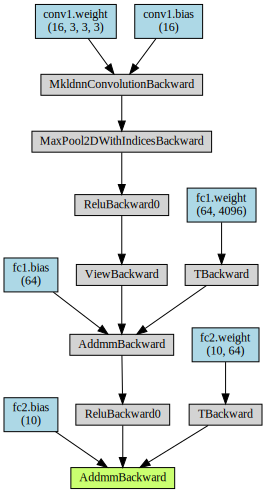

In [0]:
def visualize_network(net):
    # Visualize the architecture of the model
    # We need to give the net a fake input for this library to visualize the architecture
    fake_input = Variable(torch.zeros((1,image_dims[0], image_dims[1], image_dims[2]))).to(device)
    outputs = net(fake_input)
    # Plot the DAG (Directed Acyclic Graph) of the model
    return make_dot(outputs, dict(net.named_parameters()))

# Define what device we want to use
device = 'cpu' # 'cpu' if we want to not use the gpu
# Initialize the model, loss, and optimization function
net = MyCNN()
# This tells our model to send all of the tensors and operations to the GPU (or keep them at the CPU if we're not using GPU)
net.to(device)

visualize_network(net)


In [0]:
# Define training parameters
batch_size = 32
learning_rate = 1e-2
n_epochs = 10
# Get our data into the mini batch size that we defined
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=2)
# test_loader = torch.utils.data.DataLoader(
#     test_set, batch_size=128, sampler=test_sampler, num_workers=2)

In [0]:

def train_model(net):
    """ Train a the specified network.

        Outputs a tuple with the following four elements
        train_hist_x: the x-values (batch number) that the training set was 
            evaluated on.
        train_loss_hist: the loss values for the training set corresponding to
            the batch numbers returned in train_hist_x
        test_hist_x: the x-values (batch number) that the test set was 
            evaluated on.
        test_loss_hist: the loss values for the test set corresponding to
            the batch numbers returned in test_hist_x
    """ 
    loss, optimizer = net.get_loss(learning_rate)
    # Define some parameters to keep track of metrics
    print_every = 20
    idx = 0
    train_hist_x = []
    train_loss_hist = []
    test_hist_x = []
    test_loss_hist = []

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        running_loss = 0.0
        start_time = time.time()

        for i, data in enumerate(train_loader, 0):

            # Get inputs in right form
            inputs, labels = data
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
            
            # In Pytorch, We need to always remember to set the optimizer gradients to 0 before we recompute the new gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss and find the loss with respect to each parameter of the model
            loss_size = loss(outputs, labels)
            loss_size.backward()
            
            # Change each parameter with respect to the recently computed loss.
            optimizer.step()

            # Update statistics
            running_loss += loss_size.data.item()
            
            # Print every 20th batch of an epoch
            if (i % print_every) == print_every-1:
                print("Epoch {}, Iteration {}\t train_loss: {:.2f} took: {:.2f}s".format(
                    epoch + 1, i+1,running_loss / print_every, time.time() - start_time))
                # Reset running loss and time
                train_loss_hist.append(running_loss / print_every)
                train_hist_x.append(idx)
                running_loss = 0.0
                start_time = time.time()
            idx += 1

        # At the end of the epoch, do a pass on the test set
        total_test_loss = 0
        for inputs, labels in test_loader:

            # Wrap tensors in Variables
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # Forward pass
            test_outputs = net(inputs)
            test_loss_size = loss(test_outputs, labels)
            total_test_loss += test_loss_size.data.item()
        test_loss_hist.append(total_test_loss / len(test_loader))
        test_hist_x.append(idx)
        print("Validation loss = {:.2f}".format(
            total_test_loss / len(test_loader)))

    print("Training finished, took {:.2f}s".format(
        time.time() - training_start_time))
    return train_hist_x, train_loss_hist, test_hist_x, test_loss_hist

In [0]:
train_hist_x, train_loss_hist, test_hist_x, test_loss_hist = train_model(net)

IndexError: ignored